In [1]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import random
import numpy as np
from tqdm import tqdm
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics import silhouette_score
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


## Define the initial clusters’ centroids using:

- Forgy
- Random Partition

In [2]:
#implement random init method from scratch
def forgy_init(k, data):

    init_centroids = random.sample(range(0, len(data)), k)

    centroids = []
    for i in init_centroids:
        centroids.append(data[i])

    centroids = np.array(centroids)
    return centroids

#implement Forgy init method from scratch
def random_init(k, data):

    random_data_lable = np.random.choice(range(0, k), replace = True, size = len(data))

    cluster = []
    for _ in range(k):
        cluster.append([])

    for idx, d in enumerate(data):
        cluster[random_data_lable[idx]].append(d) 

    centroids = []
    for clist in cluster:
        centroids.append(np.mean(clist, axis=0))
    
    centroids = np.array(centroids)
    return centroids

## Implement the K Means algorithm

### Experiment with different distance measures
- Euclidean distance
- Manhattan distance

In [3]:
#implement Kmeans from scratch
class Kmeans:

    def __init__(self, k, distance_type=0, cen_init_type=0):
        self.k = k

        self.dis_type = distance_type
        self.cen_init_type = cen_init_type

    def find_nearest_centroid(self, data, calculate_episilon=False):

        if self.dis_type == 0:
            centroids_dis = -2 * np.dot(data, self.centroids.T) + np.sum(self.centroids**2,axis=1) + np.sum(data**2, axis=1)[:, np.newaxis]
        else:
            centroids_dis = []
            for d in data:
                dis = []
                for c in self.centroids:
                    dis.append(np.sum(np.absolute(c-d)))
                centroids_dis.append(dis)

        idx = np.argmin(centroids_dis, axis=1)

        epsilon = -1
        if calculate_episilon == True:
            cluster_centroid_dis = np.min(centroids_dis, axis=1)
            epsilon = np.sum(cluster_centroid_dis)
        
        return idx, epsilon

    def update_centroid(self, data, centroids_idx):
        
        clusetr = []
        for _ in range(self.k):
            clusetr.append([])

        for idx, d in enumerate(data):
            clusetr[centroids_idx[idx]].append(d) 

        self.centroids = []
        for clist in clusetr:
            self.centroids.append(np.mean(clist, axis=0))

        self.centroids = np.array(self.centroids) 

    def get_filepath(self):
        
        dir_path = "centroids"+part+"/"
        prefix = "centroids"
        
        kstr = "_k-" + str(self.k) 
        astr = "_a-1" 
        dstr = "_d-" + str(self.dis_type)
        cstr = "_c-" + str(self.cen_init_type)

        postfix = ".npy"

        file_path = dir_path + prefix + astr + kstr + dstr + cstr + postfix
        return file_path

    def train(self, train_data, trasfer_learning=False, epoch=20):

        # print("\nTrain [k="+ str(self.k) +"] :: ")

        if trasfer_learning == False:
            if self.cen_init_type == 0:
                self.centroids = random_init(self.k, train_data)
            elif self.cen_init_type == 1:
                self.centroids = forgy_init(self.k, train_data)
            else:
                print("Error")
                return
        else:
            self.load_centroids()
            return

        # for _ in tqdm(range(epoch)):
        for _ in range(epoch):
            centroids_idx, _ = self.find_nearest_centroid(train_data)
            self.update_centroid(train_data, centroids_idx)

        self.save_centroids()
        
    def save_centroids(self):
        file_path = self.get_filepath()

        with open(file_path, 'wb') as f:
            np.save(f, self.centroids)

    def load_centroids(self):
        file_path = self.get_filepath()

        with open(file_path, 'rb') as f:
            self.centroids = np.load(f)

    def check_homognity_score(self, input_data, input_data_label):
        cluster_idx, _ = self.find_nearest_centroid(input_data)
        h_score = homogeneity_score(input_data_label, cluster_idx)

        return h_score

## Implement the K Means++ algorithm

### Experiment with different distance measures
- Euclidean distance
- Manhattan distance

In [4]:
#implement Kmeans++ from scratch
class Kmeansplusplus:

    def __init__(self, k, distance_type=0):
        self.k = k

        self.dis_type = distance_type

    def find_nearest_centroid(self, data, calculate_episilon=False):

        if self.dis_type == 0:
            centroids_dis = -2 * np.dot(data, self.centroids.T) + np.sum(self.centroids**2,axis=1) + np.sum(data**2, axis=1)[:, np.newaxis]
        else:
            centroids_dis = []
            for d in data:
                dis = []
                for c in self.centroids:
                    dis.append(np.sum(np.absolute(c-d)))
                centroids_dis.append(dis)

        idx = np.argmin(centroids_dis, axis=1)

        epsilon = -1
        if calculate_episilon == True:
            cluster_centroid_dis = np.min(centroids_dis, axis=1)
            epsilon = np.sum(cluster_centroid_dis)
        
        return idx, epsilon

    def update_centroid(self, data, centroids_idx):
        
        clusetr = []
        for _ in range(self.k):
            clusetr.append([])

        for idx, d in enumerate(data):
            clusetr[centroids_idx[idx]].append(d) 

        self.centroids = []
        for clist in clusetr:
            self.centroids.append(np.mean(clist, axis=0))

        self.centroids = np.array(self.centroids) 

    def initialize_centroid(self, train_data):
        
        random_int = random.randint(0,len(train_data)-1)
        self.centroids = np.array(train_data[random_int]).reshape([-1,feature_count])

        for _ in range(self.k-1):
            centroids_dis = -2 * np.dot(train_data, self.centroids.T) + np.sum(self.centroids**2,axis=1) + np.sum(train_data**2, axis=1)[:, np.newaxis]
            cluster_centroid_dis = np.min(centroids_dis, axis=1)

            farest_point = np.argmax(cluster_centroid_dis)
            self.centroids = np.append(self.centroids, [train_data[farest_point]], axis=0)

    def get_filepath(self):
        
        dir_path = "centroids"+part+"/"
        prefix = "centroids"
        
        kstr = "_k-" + str(self.k) 
        astr = "_a-2" 
        dstr = "_d-" + str(self.dis_type)
        cstr = "_c-2"

        postfix = ".npy"

        file_path = dir_path + prefix + astr + kstr + dstr + cstr + postfix
        return file_path

    def train(self, train_data, trasfer_learning=False, epoch=20):

        # print("\nTrain [k="+ str(self.k) +"] :: ")

        if trasfer_learning == False:
            self.initialize_centroid(train_data)
        else:
            self.load_centroids()
            return

        # for _ in tqdm(range(epoch)):
        for _ in range(epoch):
            centroids_idx, _ = self.find_nearest_centroid(train_data)
            self.update_centroid(train_data, centroids_idx)

        self.save_centroids()
        
    def save_centroids(self):
        file_path = self.get_filepath()

        with open(file_path, 'wb') as f:
            np.save(f, self.centroids)

    def load_centroids(self):
        file_path = self.get_filepath()

        with open(file_path, 'rb') as f:
            self.centroids = np.load(f)

    def check_homognity_score(self, input_data, input_data_label):
        cluster_idx, _ = self.find_nearest_centroid(input_data)
        h_score = homogeneity_score(input_data_label, cluster_idx)

        return h_score

## silhouette method

In [5]:
#implement silhouette method from scratch
def silhouette(start, end, train_data, train_label, algo_type = 0, distance_type=0, cen_init_type=0, trasfer_learning=True, check_with_sklearn=False):

    k_vals = []
    score_vals = []
    score_vals_sklearn = []

    for k in tqdm(range(start, end+1)):

        if algo_type == 0:
            obj = Kmeans(k, distance_type=distance_type, cen_init_type=cen_init_type)
        elif algo_type == 1:
            obj = Kmeansplusplus(k, distance_type=distance_type)
        else:
            print("Error")
            exit()    
        
        obj.dis_type = 0
        obj.train(train_data, trasfer_learning=trasfer_learning, epoch=50)
        # obj.load_centroids()
        cluster_idx, _ = obj.find_nearest_centroid(train_data)

        clusetr = []
        for _ in range(k):
            clusetr.append([])

        for idx in range(len(train_data)):
            clusetr[cluster_idx[idx]].append(train_data[idx]) 

        si = []        
        # for i in tqdm(range(k)):
        for i in range(k):

            this_cluster = np.array(clusetr[i])
            
            intra_cluster_dis = -2 * np.dot(this_cluster, this_cluster.T) + np.sum(this_cluster**2,axis=1) + np.sum(this_cluster**2, axis=1)[:, np.newaxis]
            
            intra_cluster_dis[intra_cluster_dis<0] = 0
            intra_cluster_dis = np.sqrt(intra_cluster_dis)

            ai = np.sum(intra_cluster_dis, axis=1)/(this_cluster.shape[0] - 1)

            pre_bi = []
            for j in range(k):
                if i==j:
                    continue

                other_cluser = np.array(clusetr[j])
                inter_cluster_dis = -2 * np.dot(this_cluster, other_cluser.T) + np.sum(other_cluser**2,axis=1) + np.sum(this_cluster**2, axis=1)[:, np.newaxis]
                
                inter_cluster_dis[inter_cluster_dis<0] = 0
                inter_cluster_dis = np.sqrt(inter_cluster_dis)

                pre_bi.append(np.mean(inter_cluster_dis, axis=1))

            pre_bi = np.array(pre_bi).T
            bi = np.min(pre_bi, axis=1)
            
            numerator = bi - ai
            
            denominator = np.append([ai], [bi], axis=0)
            denominator = np.max(denominator, axis=0)

            clusetr_si = numerator/denominator
            si.extend(clusetr_si.tolist())

        si = np.array(si)
        score = np.mean(si)

        k_vals.append(k)
        score_vals.append(score)

        if check_with_sklearn == True:
            sklearn_score = silhouette_score(train_data, cluster_idx)
            score_vals_sklearn.append(sklearn_score)
            print("Sklearn Score: ", sklearn_score)
    
    return k_vals, score_vals, score_vals_sklearn

## elbow method 

In [6]:
#implement elbow method from scratch
def elbow(start, end, train_data, train_label, algo_type = 0, distance_type=0, cen_init_type=0, trasfer_learning=True, check_with_sklearn=False):

    k_vals = []
    distortions = []
    sklearn_distortions = []

    for k in tqdm(range(start, end+1)):
        # print(k)

        if algo_type == 0:
            obj = Kmeans(k, distance_type=distance_type, cen_init_type=cen_init_type)
        elif algo_type == 1:
            obj = Kmeansplusplus(k, distance_type=distance_type)
        else:
            print("Error")
            exit()    
        
        obj.train(train_data, trasfer_learning=trasfer_learning, epoch=50)
        # obj.load_centroids()
        _, e = obj.find_nearest_centroid(train_data, calculate_episilon=True)

        k_vals.append(k)
        distortions.append(e)

        if check_with_sklearn == True:
            kmeanModel = KMeans(n_clusters=k, max_iter=50)
            kmeanModel.fit(train_data)
            sklearn_distortions.append(kmeanModel.inertia_)

    return k_vals, distortions, sklearn_distortions

In [7]:
def get_sklearn_homoginity_score(start, end, train_data, train_y, validation_data, validation_y, test_data, test_y, algo_type = 0, distance_type=0, cen_init_type=0):
    sklearn_train_h_score = []
    sklearn_validation_h_score = []
    sklearn_test_h_score = []

    for k in range(start, end+1):
       
        kmeanModel = KMeans(n_clusters=k, max_iter=50)
        kmeanModel.fit(train_data)

        labels = kmeanModel.predict(train_data)
        sklearn_train_h_score.append(homogeneity_score(train_y, labels))

        labels = kmeanModel.predict(validation_data)
        sklearn_validation_h_score.append(homogeneity_score(validation_y, labels))

        labels = kmeanModel.predict(test_data)
        sklearn_test_h_score.append(homogeneity_score(test_y, labels))

    return sklearn_train_h_score, sklearn_validation_h_score, sklearn_test_h_score

def get_homoginity_score(start, end, train_data, train_y, validation_data, validation_y, test_data, test_y, algo_type = 0, distance_type=0, cen_init_type=0):

    train_h_score = []
    validation_h_score = []
    test_h_score = []

    for k in tqdm(range(start, end+1)):

        if algo_type == 0:
            obj = Kmeans(k, distance_type=distance_type, cen_init_type=cen_init_type)
        elif algo_type == 1:
            obj = Kmeansplusplus(k, distance_type=distance_type)
        else:
            print("Error")
            exit()    

        obj.load_centroids()

        train_h_score.append(obj.check_homognity_score(train_data, train_y))
        validation_h_score.append(obj.check_homognity_score(validation_data, validation_y))
        test_h_score.append(obj.check_homognity_score(test_data, test_y))

    return train_h_score, validation_h_score, test_h_score

In [8]:
def plot_graph(x_vals, y_vals, x_label, y_label, title):
    plt.plot(x_vals, y_vals, 'bx-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

# Part 1

## Load the dataset

In [9]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
part = "_part_1"
feature_count=784

## Do we need to normalise data? [If so Does it make any difference?]

### ANS:

- In this case No
- Beacuse all features are in the same range

- But if all features are not in the same range then we have to normalize the data

In [10]:
max_ele = np.max(trainX)
min_ele = np.min(trainX)

trainX = ((trainX-min_ele)/(max_ele-min_ele)).reshape([-1, feature_count])
testX = ((testX-min_ele)/(max_ele-min_ele)).reshape([-1, feature_count])

## perform splitting into training and validation sets with 70:30 ratio

In [40]:
trainX, validationX, trainy, validationy = train_test_split(trainX, trainy, test_size=0.30)

## Plot 

### error vs number of clusters graph 
    using the elbow method 
    silhouette method
    
### Report the optimal number of clusters found.

In [12]:
_, elbow_a0_d0_c0_p1, _ = elbow(2,15,trainX, trainy, algo_type=0, distance_type=0, cen_init_type=0)
print("Distortion:", elbow_a0_d0_c0_p1)

100%|██████████| 14/14 [00:01<00:00,  9.19it/s]

Distortion: [2261359.143922232, 1936370.122169237, 1811316.1380192393, 1649739.437830609, 1592560.9319335227, 1469192.5540909201, 1426500.1259410663, 1393325.7873042386, 1343907.4777543105, 1309707.3242240804, 1291419.2761542636, 1249736.5502274719, 1225925.636662954, 1210871.5462253809]


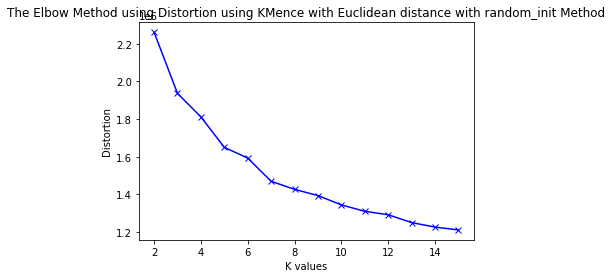

In [13]:
plot_graph(range(2, 16), elbow_a0_d0_c0_p1, 'K values', 'Distortion', 'The Elbow Method using Distortion using KMence with Euclidean distance with random_init Method')

In [14]:
_, elbow_a0_d0_c1_p1, _ = elbow(2,15,trainX, trainy, algo_type=0, distance_type=0, cen_init_type=1)
print("Distortion:", elbow_a0_d0_c1_p1)

100%|██████████| 14/14 [00:01<00:00,  8.52it/s]

Distortion: [2261376.176635823, 1936414.889981811, 1754410.2536841654, 1649667.7423788772, 1540517.2716500503, 1469121.8140980187, 1418628.0891657772, 1380903.5572612002, 1334253.6318311256, 1314947.0528766385, 1272557.96015466, 1255296.1506031442, 1240961.4700220232, 1209742.8780663267]


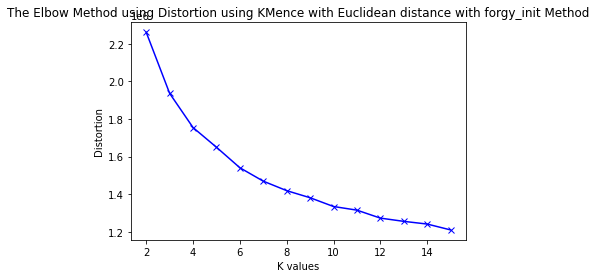

In [15]:
plot_graph(range(2, 16), elbow_a0_d0_c1_p1, 'K values', 'Distortion', 'The Elbow Method using Distortion using KMence with Euclidean distance with forgy_init Method')

In [16]:
_, elbow_a0_d1_c0_p1, _ = elbow(2,15,trainX, trainy, algo_type=0, distance_type=1, cen_init_type=0)
print("Distortion:", elbow_a0_d1_c0_p1)

100%|██████████| 14/14 [00:25<00:00,  1.83s/it]

Distortion: [6360700.948265497, 5635416.184404164, 5267972.234272855, 4965971.620570654, 4786077.083928782, 4656513.094131102, 4550713.936782821, 4422437.6897923965, 4242796.184791211, 4193110.9268964035, 4176837.0634539705, 4129388.772181181, 4056687.0308640576, 4030866.5301388362]


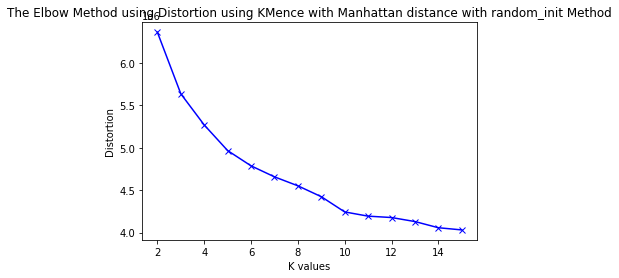

In [17]:
plot_graph(range(2, 16), elbow_a0_d1_c0_p1, 'K values', 'Distortion', 'The Elbow Method using Distortion using KMence with Manhattan distance with random_init Method')

In [18]:
_, elbow_a0_d1_c1_p1, _ = elbow(2,15,trainX, trainy, algo_type=0, distance_type=1, cen_init_type=1)
print("Distortion:", elbow_a0_d1_c1_p1)

100%|██████████| 14/14 [00:25<00:00,  1.80s/it]

Distortion: [6360762.709832294, 5635416.184404164, 5268017.258609319, 4965971.620570654, 4786150.446217679, 4616241.322828411, 4492143.897123597, 4336193.79841399, 4275283.798773692, 4214953.92525414, 4133141.588551016, 4069528.865492879, 4110270.7061855197, 3938560.6259912546]


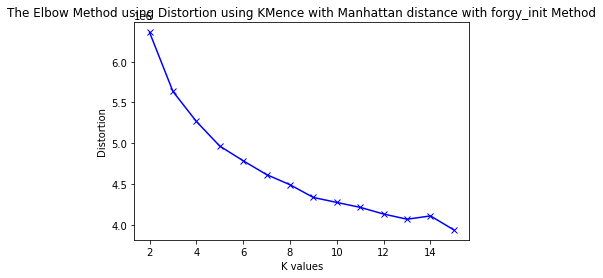

In [19]:
plot_graph(range(2, 16), elbow_a0_d1_c1_p1, 'K values', 'Distortion', 'The Elbow Method using Distortion using KMence with Manhattan distance with forgy_init Method')

In [20]:
_, elbow_a1_d0_c2_p1, _ = elbow(2,15,trainX, trainy, algo_type=1, distance_type=0)
print("Distortion:", elbow_a1_d0_c2_p1)

100%|██████████| 14/14 [00:01<00:00,  9.37it/s]

Distortion: [2261376.176635823, 1936414.889981811, 1754392.8543000906, 1649660.9436124442, 1577575.2616756612, 1469120.5739542935, 1420936.8960508623, 1384797.3797166967, 1342349.0361755295, 1321393.2730555218, 1286819.6140328534, 1254342.302152586, 1238243.398188273, 1235850.656766018]


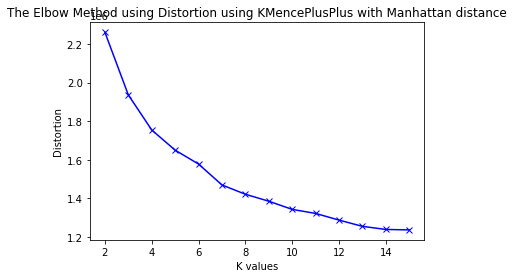

In [21]:
plot_graph(range(2, 16), elbow_a1_d0_c2_p1, 'K values', 'Distortion', 'The Elbow Method using Distortion using KMencePlusPlus with Manhattan distance')

In [22]:
_, elbow_a1_d1_c2_p1, _ = elbow(2,15,trainX, trainy, algo_type=1, distance_type=1)
print("Distortion:", elbow_a1_d1_c2_p1)

100%|██████████| 14/14 [00:24<00:00,  1.72s/it]

Distortion: [6360700.948265497, 5635224.599621896, 5267972.234272855, 4966224.784987915, 4786138.927366256, 4656430.040711541, 4446068.191349408, 4361262.806010364, 4242840.749207078, 4182144.8792242943, 4141780.6065909266, 4082353.412367313, 4054629.146734094, 3979432.0517513403]


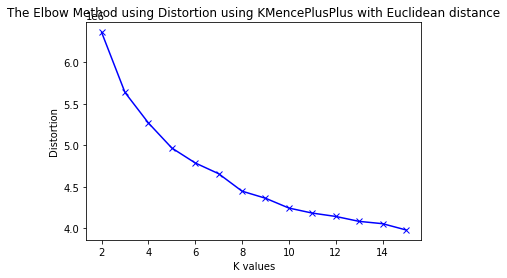

In [23]:
plot_graph(range(2, 16), elbow_a1_d1_c2_p1, 'K values', 'Distortion', 'The Elbow Method using Distortion using KMencePlusPlus with Euclidean distance')

In [24]:
_, silhouette_a0_d0_c0_p1, _ = silhouette(5,15,trainX, trainy, algo_type=0, distance_type=0, cen_init_type=0)
print("Silhouette Score:", silhouette_a0_d0_c0_p1)

100%|██████████| 11/11 [04:14<00:00, 23.10s/it]

Silhouette Score: [0.15482437336092716, 0.15126832452637923, 0.1655796860116091, 0.15652749852834327, 0.1505123745625517, 0.14684906303499734, 0.1358836152124624, 0.12831477599531466, 0.1392746313017221, 0.12353751753793696, 0.11952182767186013]


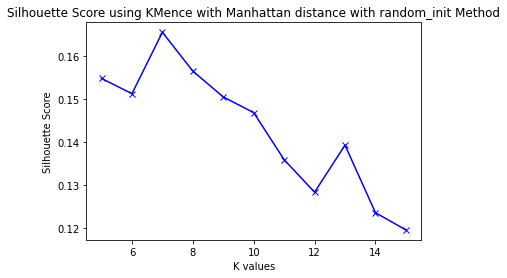

In [25]:
plot_graph(range(5, 16), silhouette_a0_d0_c0_p1, 'K values', 'Silhouette Score', 'Silhouette Score using KMence with Manhattan distance with random_init Method')

In [26]:
_, silhouette_a0_d0_c1_p1, _ = silhouette(5,15,trainX, trainy, algo_type=0, distance_type=0, cen_init_type=1)
print("Silhouette Score:", silhouette_a0_d0_c1_p1)

100%|██████████| 11/11 [04:14<00:00, 23.12s/it]

Silhouette Score: [0.15516049889935757, 0.15667842999828896, 0.16574068826596097, 0.15507938110699343, 0.1527875559668853, 0.1550816184173682, 0.1365029190925913, 0.13143040840824632, 0.13006566540379133, 0.12153004974817871, 0.1253993200828671]


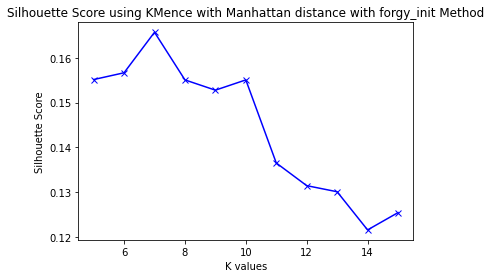

In [27]:
plot_graph(range(5, 16), silhouette_a0_d0_c1_p1, 'K values', 'Silhouette Score', 'Silhouette Score using KMence with Manhattan distance with forgy_init Method')

In [28]:
_, silhouette_a0_d1_c0_p1, _ = silhouette(5,15,trainX, trainy, algo_type=0, distance_type=1, cen_init_type=0)
print("Silhouette Score:", silhouette_a0_d1_c0_p1)

100%|██████████| 11/11 [04:13<00:00, 23.00s/it]

Silhouette Score: [0.15482437336092716, 0.15126832452637923, 0.1655796860116091, 0.15652749852834327, 0.1505123745625517, 0.14684906303499734, 0.1358836152124624, 0.12831477599531466, 0.1392746313017221, 0.12353751753793696, 0.11952182767186013]


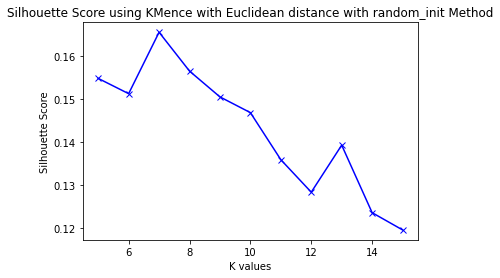

In [29]:
plot_graph(range(5, 16), silhouette_a0_d1_c0_p1, 'K values', 'Silhouette Score', 'Silhouette Score using KMence with Euclidean distance with random_init Method')

In [30]:
_, silhouette_a0_d1_c1_p1, _ = silhouette(5,15,trainX, trainy, algo_type=0, distance_type=1, cen_init_type=1)
print("Silhouette Score:", silhouette_a0_d1_c1_p1)

100%|██████████| 11/11 [04:11<00:00, 22.90s/it]

Silhouette Score: [0.15516049889935757, 0.15667842999828896, 0.16574068826596097, 0.15507938110699343, 0.1527875559668853, 0.1550816184173682, 0.1365029190925913, 0.13143040840824632, 0.13006566540379133, 0.12153004974817871, 0.1253993200828671]


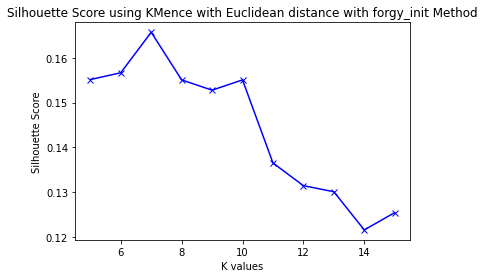

In [31]:
plot_graph(range(5, 16), silhouette_a0_d1_c1_p1, 'K values', 'Silhouette Score', 'Silhouette Score using KMence with Euclidean distance with forgy_init Method')

In [32]:
_, silhouette_a1_d0_c2_p1, _ = silhouette(5,15,trainX, trainy, algo_type=1, distance_type=0)
print("Silhouette Score:", silhouette_a1_d0_c2_p1)

100%|██████████| 11/11 [04:09<00:00, 22.64s/it]

Silhouette Score: [0.15541839039330713, 0.15970578039045003, 0.16580916967823453, 0.17130514384647008, 0.15391373694648997, 0.1490494915467755, 0.13702575374152998, 0.12838867542077798, 0.12645035062242665, 0.1209238090860154, 0.13303407944129994]


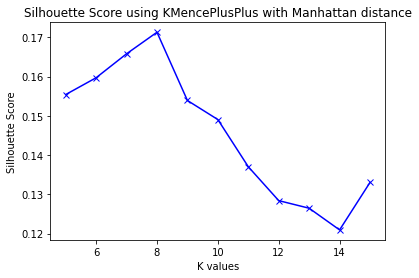

In [33]:
plot_graph(range(5, 16), silhouette_a1_d0_c2_p1, 'K values', 'Silhouette Score', 'Silhouette Score using KMencePlusPlus with Manhattan distance')

In [34]:
_, silhouette_a1_d1_c2_p1, _ = silhouette(5,15,trainX, trainy, algo_type=1, distance_type=1)
print("Silhouette Score:", silhouette_a1_d1_c2_p1)

100%|██████████| 11/11 [04:10<00:00, 22.81s/it]

Silhouette Score: [0.15541839039330713, 0.15970578039045003, 0.16580916967823453, 0.17130514384647008, 0.15391373694648997, 0.1490494915467755, 0.13702575374152998, 0.12838867542077798, 0.12645035062242665, 0.1209238090860154, 0.13303407944129994]


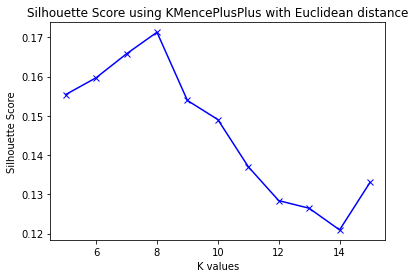

In [35]:
plot_graph(range(5, 16), silhouette_a1_d1_c2_p1, 'K values', 'Silhouette Score', 'Silhouette Score using KMencePlusPlus with Euclidean distance')

## Report 

### training and the validation accuracy with Compare your trained model with a model trained by the scikit-learn

### sklearn 

In [41]:
sklearn_train_h_score, sklearn_validation_h_score, sklearn_test_h_score = get_sklearn_homoginity_score(2,15,trainX, trainy, validationX, validationy, testX, testy)

In [42]:
from tabulate import tabulate

table_data = []

table_data.append(range(2,16))
table_data.append(sklearn_train_h_score)
table_data.append(sklearn_validation_h_score)
table_data.append(sklearn_test_h_score)

table_data = np.array(table_data).T

print("Homoginity Score:\n")
print(tabulate(table_data, headers=['k', 'Train-data', 'Validation Data','Test Data']))

Homoginity Score:

  k    Train-data    Validation Data    Test Data
---  ------------  -----------------  -----------
  2      0.122398           0.120633     0.122418
  3      0.245716           0.248765     0.244849
  4      0.317397           0.322603     0.31321
  5      0.354835           0.362797     0.353255
  6      0.424956           0.430173     0.418938
  7      0.477751           0.486222     0.473026
  8      0.472999           0.481119     0.473737
  9      0.473203           0.479871     0.475926
 10      0.515122           0.522997     0.519609
 11      0.505              0.515232     0.510342
 12      0.529702           0.538517     0.535076
 13      0.54918            0.555651     0.548903
 14      0.583351           0.594424     0.582015
 15      0.595374           0.603722     0.592894


### Own Algo

In [43]:
train_h_score_a0_d0_c0_p1, validation_h_score_a0_d0_c0_p1, test_h_score_a0_d0_c0_p1 = get_homoginity_score(2,15,trainX, trainy, validationX, validationy, testX, testy, algo_type=0, distance_type=0, cen_init_type=0)
print("KMence with Euclidean distance with random_init Method")

table_data = []

table_data.append(range(2,16))
table_data.append(train_h_score_a0_d0_c0_p1)
table_data.append(validation_h_score_a0_d0_c0_p1)
table_data.append(test_h_score_a0_d0_c0_p1)

table_data = np.array(table_data).T

print("Homoginity Score:\n")
print(tabulate(table_data, headers=['k', 'Train-data', 'Validation Data','Test Data']))

100%|██████████| 14/14 [00:02<00:00,  6.33it/s]

KMence with Euclidean distance with random_init Method
Homoginity Score:

  k    Train-data    Validation Data    Test Data
---  ------------  -----------------  -----------
  2      0.125335           0.123181     0.1249
  3      0.24633            0.249737     0.2449
  4      0.309025           0.312487     0.308294
  5      0.371362           0.375041     0.364335
  6      0.380045           0.386004     0.378408
  7      0.477841           0.486242     0.47296
  8      0.482703           0.490587     0.477351
  9      0.504324           0.509904     0.497761
 10      0.529743           0.539888     0.530644
 11      0.543219           0.54821      0.541311
 12      0.553978           0.556663     0.551817
 13      0.53733            0.544719     0.543148
 14      0.563006           0.569119     0.564339
 15      0.553228           0.561087     0.554167


In [44]:
train_h_score_a0_d0_c1_p1, validation_h_score_a0_d0_c1_p1, test_h_score_a0_d0_c1_p1 = get_homoginity_score(2,15,trainX, trainy, validationX, validationy, testX, testy, algo_type=0, distance_type=0, cen_init_type=1)
print("KMence with Euclidean distance with forgy_init Method")

table_data = []

table_data.append(range(2,16))
table_data.append(train_h_score_a0_d0_c1_p1)
table_data.append(validation_h_score_a0_d0_c1_p1)
table_data.append(test_h_score_a0_d0_c1_p1)

table_data = np.array(table_data).T

print("Homoginity Score:\n")
print(tabulate(table_data, headers=['k', 'Train-data', 'Validation Data','Test Data']))

100%|██████████| 14/14 [00:02<00:00,  6.28it/s]

KMence with Euclidean distance with forgy_init Method
Homoginity Score:

  k    Train-data    Validation Data    Test Data
---  ------------  -----------------  -----------
  2      0.125194           0.122913     0.12551
  3      0.246611           0.249592     0.245665
  4      0.316753           0.322328     0.312748
  5      0.372261           0.376153     0.365144
  6      0.422888           0.428468     0.418039
  7      0.477549           0.485827     0.472339
  8      0.471011           0.4791       0.469549
  9      0.474414           0.483701     0.466819
 10      0.496781           0.507993     0.502008
 11      0.536913           0.547156     0.53845
 12      0.522675           0.532012     0.523444
 13      0.578709           0.586304     0.578863
 14      0.56015            0.565099     0.558374
 15      0.576583           0.58339      0.574304


In [45]:
train_h_score_a0_d1_c0_p1, validation_h_score_a0_d1_c0_p1, test_h_score_a0_d1_c0_p1 = get_homoginity_score(2,15,trainX, trainy, validationX, validationy, testX, testy, algo_type=0, distance_type=1, cen_init_type=0)
print("KMence with Manhattan distance with random_init Method")

table_data = []

table_data.append(range(2,16))
table_data.append(train_h_score_a0_d1_c0_p1)
table_data.append(validation_h_score_a0_d1_c0_p1)
table_data.append(test_h_score_a0_d1_c0_p1)

table_data = np.array(table_data).T

print("Homoginity Score:\n")
print(tabulate(table_data, headers=['k', 'Train-data', 'Validation Data','Test Data']))

100%|██████████| 14/14 [00:32<00:00,  2.34s/it]

KMence with Manhattan distance with random_init Method
Homoginity Score:

  k    Train-data    Validation Data    Test Data
---  ------------  -----------------  -----------
  2      0.122825           0.12108      0.122264
  3      0.247273           0.24808      0.244344
  4      0.304347           0.306966     0.302184
  5      0.367388           0.369893     0.365181
  6      0.425713           0.427423     0.420656
  7      0.424194           0.42522      0.416669
  8      0.45003            0.450634     0.444073
  9      0.464045           0.464867     0.458662
 10      0.495026           0.49974      0.491535
 11      0.518706           0.525671     0.514342
 12      0.508224           0.512217     0.502458
 13      0.506885           0.511705     0.505149
 14      0.530772           0.53799      0.528677
 15      0.537245           0.543243     0.533229


In [46]:
train_h_score_a0_d1_c1_p1, validation_h_score_a0_d1_c1_p1, test_h_score_a0_d1_c1_p1 = get_homoginity_score(2,15,trainX, trainy, validationX, validationy, testX, testy, algo_type=0, distance_type=1, cen_init_type=1)
print("KMence with Manhattan distance with forgy_init Method")

table_data = []

table_data.append(range(2,16))
table_data.append(train_h_score_a0_d1_c1_p1)
table_data.append(validation_h_score_a0_d1_c1_p1)
table_data.append(test_h_score_a0_d1_c1_p1)

table_data = np.array(table_data).T

print("Homoginity Score:\n")
print(tabulate(table_data, headers=['k', 'Train-data', 'Validation Data','Test Data']))

100%|██████████| 14/14 [00:32<00:00,  2.32s/it]

KMence with Manhattan distance with forgy_init Method
Homoginity Score:

  k    Train-data    Validation Data    Test Data
---  ------------  -----------------  -----------
  2      0.122789           0.12108      0.122208
  3      0.247273           0.24808      0.244344
  4      0.304433           0.306879     0.302282
  5      0.367388           0.369893     0.365181
  6      0.425726           0.427557     0.420656
  7      0.413425           0.416571     0.410674
  8      0.450234           0.450933     0.445808
  9      0.49015            0.492204     0.484566
 10      0.497069           0.500932     0.493058
 11      0.502314           0.507448     0.496382
 12      0.525732           0.533541     0.521719
 13      0.515198           0.521841     0.51013
 14      0.516284           0.521051     0.512321
 15      0.547016           0.556314     0.548476


In [47]:
train_h_score_a1_d0_c2_p1, validation_h_score_a1_d0_c2_p1, test_h_score_a1_d0_c2_p1 = get_homoginity_score(2,15,trainX, trainy, validationX, validationy, testX, testy, algo_type=1, distance_type=0)
print("KMencePlusPlus with Manhattan distance")

table_data = []

table_data.append(range(2,16))
table_data.append(train_h_score_a1_d0_c2_p1)
table_data.append(validation_h_score_a1_d0_c2_p1)
table_data.append(test_h_score_a1_d0_c2_p1)

table_data = np.array(table_data).T

print("Homoginity Score:\n")
print(tabulate(table_data, headers=['k', 'Train-data', 'Validation Data','Test Data']))

100%|██████████| 14/14 [00:02<00:00,  6.32it/s]

KMencePlusPlus with Manhattan distance
Homoginity Score:

  k    Train-data    Validation Data    Test Data
---  ------------  -----------------  -----------
  2      0.125194           0.122913     0.12551
  3      0.246611           0.249592     0.245665
  4      0.31775            0.32318      0.313429
  5      0.374386           0.376761     0.36641
  6      0.423641           0.429793     0.419749
  7      0.478142           0.486059     0.472509
  8      0.489277           0.496401     0.4844
  9      0.492996           0.499263     0.487454
 10      0.497078           0.505109     0.4927
 11      0.506591           0.514371     0.510538
 12      0.522428           0.531377     0.522114
 13      0.52708            0.537197     0.528812
 14      0.532201           0.541803     0.533762
 15      0.527681           0.5375       0.531521


In [48]:
train_h_score_a1_d1_c2_p1, validation_h_score_a1_d1_c2_p1, test_h_score_a1_d1_c2_p1 = get_homoginity_score(2,15,trainX, trainy, validationX, validationy, testX, testy, algo_type=1, distance_type=1)
print("KMencePlusPlus with Euclidean distance")

table_data = []

table_data.append(range(2,16))
table_data.append(train_h_score_a1_d1_c2_p1)
table_data.append(validation_h_score_a1_d1_c2_p1)
table_data.append(test_h_score_a1_d1_c2_p1)

table_data = np.array(table_data).T

print("Homoginity Score:\n")
print(tabulate(table_data, headers=['k', 'Train-data', 'Validation Data','Test Data']))

100%|██████████| 14/14 [00:31<00:00,  2.24s/it]

KMencePlusPlus with Euclidean distance
Homoginity Score:

  k    Train-data    Validation Data    Test Data
---  ------------  -----------------  -----------
  2      0.122825           0.12108      0.122264
  3      0.247264           0.248185     0.24432
  4      0.304347           0.306966     0.302184
  5      0.367382           0.369682     0.365087
  6      0.425684           0.427377     0.420651
  7      0.42403            0.425026     0.416651
  8      0.462769           0.465926     0.45634
  9      0.480699           0.488577     0.479367
 10      0.49497            0.499648     0.491256
 11      0.502996           0.507851     0.501234
 12      0.513672           0.521146     0.51205
 13      0.520478           0.528616     0.520766
 14      0.521277           0.527297     0.518711
 15      0.536665           0.54462      0.534965


### Visualize the dataset to depict the clusters formed

# Part 2

## Load the dataset

In [49]:
data = pd.read_csv('data.csv') 
part = "_part_2"
feature_count=192

## Do we need to normalise data? [If so Does it make any difference?]

### ANS:

- In this case No
- Beacuse all features are in the same range

- But if all features are not in the same range then we have to normalize the data

In [50]:
X = data.iloc[:,:feature_count].to_numpy()
y = data.iloc[:,feature_count].to_numpy()

for _ in range(len(X)):
    X[_][0] = X[_][0][1:]
    X[_][feature_count-1] = X[_][feature_count-1][:-1]

X = X.astype(np.float)

max_ele = np.max(X, axis=0)
min_ele = np.min(X, axis=0)

drop_column_list = []
diff_max_min = max_ele - min_ele
for i in range(len(max_ele)):
    if diff_max_min[i] < 0.3:
        drop_column_list.append(i)


data.drop(data.columns[drop_column_list], axis = 1, inplace = True) 

feature_count = len(data.columns) - 1 

X = data.iloc[:,:feature_count].to_numpy()
y = data.iloc[:,feature_count].to_numpy()

for _ in range(len(X)):
    X[_][0] = X[_][0][1:]

X = X.astype(np.float)

max_ele = np.max(X, axis=0)
min_ele = np.min(X, axis=0)

X = ((X-min_ele)/(max_ele-min_ele)).reshape([-1, feature_count])

max_ele = np.max(X, axis=0)
min_ele = np.min(X, axis=0)

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.10)

## perform splitting into training and validation sets with 70:30 ratio

In [51]:
trainX, validationX, trainy, validationy = train_test_split(trainX, trainy, test_size=0.30)

## Plot 

### error vs number of clusters graph 
    using the elbow method 
    silhouette method
    
### Report the optimal number of clusters found.

In [52]:
_, elbow_a0_d0_c0_p1, _ = elbow(2,15,trainX, trainy, algo_type=0, distance_type=0, cen_init_type=0)
print("Distortion:", elbow_a0_d0_c0_p1)

100%|██████████| 14/14 [00:00<00:00, 40.64it/s]

Distortion: [159973.88007124022, 128135.63127493503, 102127.43586035, 93967.33890093802, 82857.03662523157, 76593.4316040111, 69941.30044217293, 68779.68397647687, 63976.3441680292, 61814.693535827435, 58877.425935637606, 56942.735427026826, 55997.19861292968, 53910.52947204881]


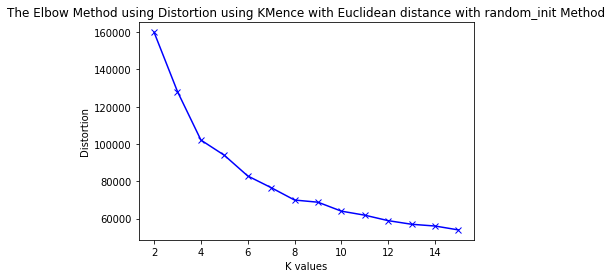

In [53]:
plot_graph(range(2, 16), elbow_a0_d0_c0_p1, 'K values', 'Distortion', 'The Elbow Method using Distortion using KMence with Euclidean distance with random_init Method')

In [54]:
_, elbow_a0_d0_c1_p1, _ = elbow(2,15,trainX, trainy, algo_type=0, distance_type=0, cen_init_type=1)
print("Distortion:", elbow_a0_d0_c1_p1)

100%|██████████| 14/14 [00:00<00:00, 39.60it/s]

Distortion: [159973.89360666758, 128334.296817671, 102127.4172834316, 94639.07510624264, 83746.86861560223, 75697.49534298982, 72773.91679825544, 66890.88319819266, 63647.73708437008, 61231.470023747184, 59190.856572640616, 57630.99006297751, 54823.909565458554, 53414.311430245325]


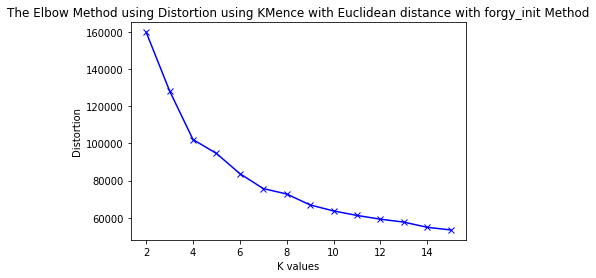

In [55]:
plot_graph(range(2, 16), elbow_a0_d0_c1_p1, 'K values', 'Distortion', 'The Elbow Method using Distortion using KMence with Euclidean distance with forgy_init Method')

In [56]:
_, elbow_a0_d1_c0_p1, _ = elbow(2,15,trainX, trainy, algo_type=0, distance_type=1, cen_init_type=0)
print("Distortion:", elbow_a0_d1_c0_p1)

100%|██████████| 14/14 [00:19<00:00,  1.37s/it]

Distortion: [778312.0127019298, 681671.5670218637, 609365.1073339025, 585090.4437622557, 542794.4929648163, 517697.0369632824, 501447.8481711005, 494129.1787602152, 469355.2538510824, 462416.34840674815, 450374.5154550795, 442070.697526499, 437462.6450927359, 428608.74967906275]


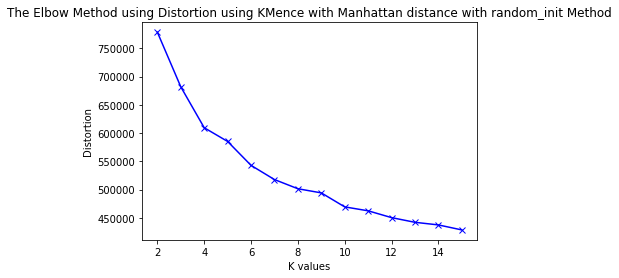

In [57]:
plot_graph(range(2, 16), elbow_a0_d1_c0_p1, 'K values', 'Distortion', 'The Elbow Method using Distortion using KMence with Manhattan distance with random_init Method')

In [58]:
_, elbow_a0_d1_c1_p1, _ = elbow(2,15,trainX, trainy, algo_type=0, distance_type=1, cen_init_type=1)
print("Distortion:", elbow_a0_d1_c1_p1)

100%|██████████| 14/14 [00:19<00:00,  1.38s/it]

Distortion: [778312.0127019298, 684974.9359119823, 609392.1942779602, 584607.2582423635, 546642.4523081867, 517093.7168025416, 501313.7037208369, 484629.1643427266, 471047.580311662, 459144.96771663084, 451740.7926603513, 441821.35596903187, 438178.4621774171, 424952.4748684026]


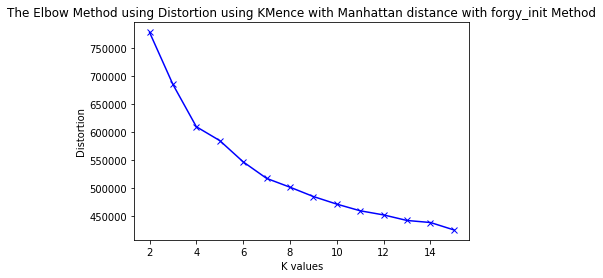

In [59]:
plot_graph(range(2, 16), elbow_a0_d1_c1_p1, 'K values', 'Distortion', 'The Elbow Method using Distortion using KMence with Manhattan distance with forgy_init Method')

In [60]:
_, elbow_a1_d0_c2_p1, _ = elbow(2,15,trainX, trainy, algo_type=1, distance_type=0)
print("Distortion:", elbow_a1_d0_c2_p1)

100%|██████████| 14/14 [00:00<00:00, 40.56it/s]

Distortion: [159973.89360666758, 128135.63127493503, 102127.19218342625, 94306.8750064283, 82857.04527290011, 75695.22862760402, 73473.97449867937, 66890.76533184476, 64064.24473430521, 61232.13804076104, 59171.12991409337, 57018.1087662736, 55424.41082886421, 53025.62647556118]


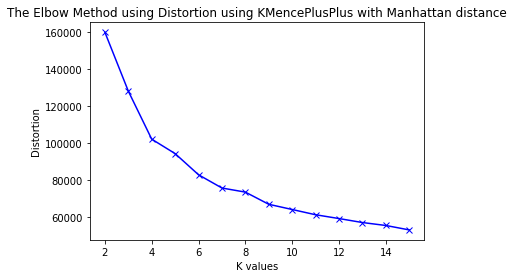

In [61]:
plot_graph(range(2, 16), elbow_a1_d0_c2_p1, 'K values', 'Distortion', 'The Elbow Method using Distortion using KMencePlusPlus with Manhattan distance')

In [62]:
_, elbow_a1_d1_c2_p1, _ = elbow(2,15,trainX, trainy, algo_type=1, distance_type=1)
print("Distortion:", elbow_a1_d1_c2_p1)

100%|██████████| 14/14 [00:19<00:00,  1.39s/it]

Distortion: [778312.0127019298, 684974.9359119823, 609381.6218732371, 572391.9705519603, 542958.2688993431, 517684.63824195456, 494382.51515925175, 479572.2750176911, 469303.2078133991, 458848.21344778314, 453337.057347816, 443054.8811142943, 438845.2815313489, 427208.10441162414]


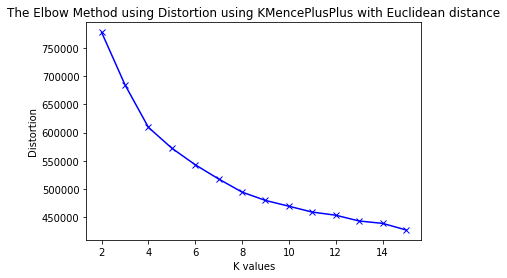

In [63]:
plot_graph(range(2, 16), elbow_a1_d1_c2_p1, 'K values', 'Distortion', 'The Elbow Method using Distortion using KMencePlusPlus with Euclidean distance')

In [64]:
_, silhouette_a0_d0_c0_p1, _ = silhouette(5,15,trainX, trainy, algo_type=0, distance_type=0, cen_init_type=0)
print("Silhouette Score:", silhouette_a0_d0_c0_p1)

100%|██████████| 11/11 [02:19<00:00, 12.67s/it]

Silhouette Score: [0.2680755296584726, 0.277692988499687, 0.23920769729358007, 0.25255686082747475, 0.246483899377658, 0.2432280996276037, 0.23552363608974103, 0.23538337224922667, 0.2086568506775999, 0.20378574894392948, 0.21501680426348346]


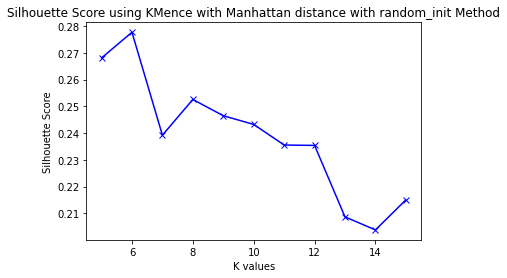

In [65]:
plot_graph(range(5, 16), silhouette_a0_d0_c0_p1, 'K values', 'Silhouette Score', 'Silhouette Score using KMence with Manhattan distance with random_init Method')

In [66]:
_, silhouette_a0_d0_c1_p1, _ = silhouette(5,15,trainX, trainy, algo_type=0, distance_type=0, cen_init_type=1)
print("Silhouette Score:", silhouette_a0_d0_c1_p1)

100%|██████████| 11/11 [02:19<00:00, 12.72s/it]

Silhouette Score: [0.23908982279120744, 0.25017132919725094, 0.2634640050544522, 0.2290508700357786, 0.25678983298855423, 0.2381275564842116, 0.23185702173982725, 0.21781990043097474, 0.233338584895169, 0.20580576823462526, 0.22201197167407025]


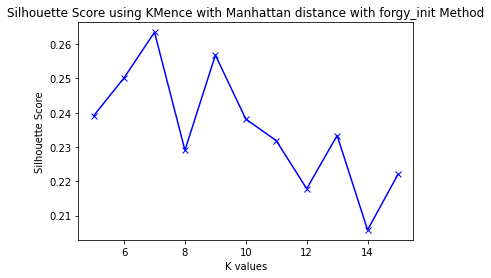

In [67]:
plot_graph(range(5, 16), silhouette_a0_d0_c1_p1, 'K values', 'Silhouette Score', 'Silhouette Score using KMence with Manhattan distance with forgy_init Method')

In [68]:
_, silhouette_a0_d1_c0_p1, _ = silhouette(5,15,trainX, trainy, algo_type=0, distance_type=1, cen_init_type=0)
print("Silhouette Score:", silhouette_a0_d1_c0_p1)

100%|██████████| 11/11 [02:22<00:00, 12.93s/it]

Silhouette Score: [0.2680755296584726, 0.277692988499687, 0.23920769729358007, 0.25255686082747475, 0.246483899377658, 0.2432280996276037, 0.23552363608974103, 0.23538337224922667, 0.2086568506775999, 0.20378574894392948, 0.21501680426348346]


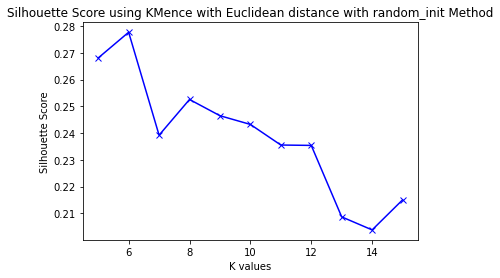

In [69]:
plot_graph(range(5, 16), silhouette_a0_d1_c0_p1, 'K values', 'Silhouette Score', 'Silhouette Score using KMence with Euclidean distance with random_init Method')

In [70]:
_, silhouette_a0_d1_c1_p1, _ = silhouette(5,15,trainX, trainy, algo_type=0, distance_type=1, cen_init_type=1)
print("Silhouette Score:", silhouette_a0_d1_c1_p1)

100%|██████████| 11/11 [02:23<00:00, 13.03s/it]

Silhouette Score: [0.23908982279120744, 0.25017132919725094, 0.2634640050544522, 0.2290508700357786, 0.25678983298855423, 0.2381275564842116, 0.23185702173982725, 0.21781990043097474, 0.233338584895169, 0.20580576823462526, 0.22201197167407025]


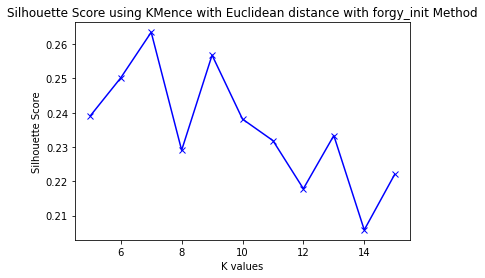

In [71]:
plot_graph(range(5, 16), silhouette_a0_d1_c1_p1, 'K values', 'Silhouette Score', 'Silhouette Score using KMence with Euclidean distance with forgy_init Method')

In [72]:
_, silhouette_a1_d0_c2_p1, _ = silhouette(5,15,trainX, trainy, algo_type=1, distance_type=0)
print("Silhouette Score:", silhouette_a1_d0_c2_p1)

100%|██████████| 11/11 [02:22<00:00, 12.95s/it]

Silhouette Score: [0.24306832349310423, 0.27769874114229914, 0.2633286880698653, 0.24240423731894128, 0.25678691314112445, 0.23574698033456537, 0.23186838961314996, 0.2252057293751736, 0.22287433789656333, 0.21807409819874102, 0.20389831957153934]


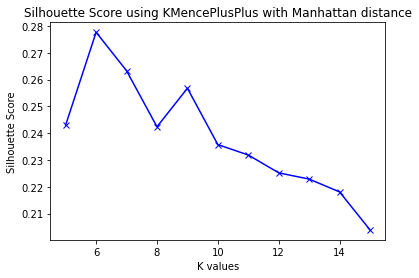

In [73]:
plot_graph(range(5, 16), silhouette_a1_d0_c2_p1, 'K values', 'Silhouette Score', 'Silhouette Score using KMencePlusPlus with Manhattan distance')

In [74]:
_, silhouette_a1_d1_c2_p1, _ = silhouette(5,15,trainX, trainy, algo_type=1, distance_type=1)
print("Silhouette Score:", silhouette_a1_d1_c2_p1)

100%|██████████| 11/11 [02:22<00:00, 12.97s/it]

Silhouette Score: [0.24306832349310423, 0.27769874114229914, 0.2633286880698653, 0.24240423731894128, 0.25678691314112445, 0.23574698033456537, 0.23186838961314996, 0.2252057293751736, 0.22287433789656333, 0.21807409819874102, 0.20389831957153934]


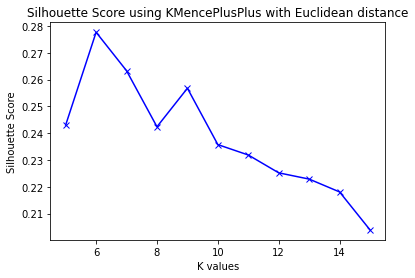

In [75]:
plot_graph(range(5, 16), silhouette_a1_d1_c2_p1, 'K values', 'Silhouette Score', 'Silhouette Score using KMencePlusPlus with Euclidean distance')

## Report 

### training and the validation accuracy with Compare your trained model with a model trained by the scikit-learn

### sklearn 

In [76]:
sklearn_train_h_score, sklearn_validation_h_score, sklearn_test_h_score = get_sklearn_homoginity_score(2,15,trainX, trainy, validationX, validationy, testX, testy)

In [77]:
from tabulate import tabulate

table_data = []

table_data.append(range(2,16))
table_data.append(sklearn_train_h_score)
table_data.append(sklearn_validation_h_score)
table_data.append(sklearn_test_h_score)

table_data = np.array(table_data).T

print("Homoginity Score:\n")
print(tabulate(table_data, headers=['k', 'Train-data', 'Validation Data','Test Data']))

Homoginity Score:

  k    Train-data    Validation Data    Test Data
---  ------------  -----------------  -----------
  2      0.128521           0.126353     0.1319
  3      0.202493           0.204268     0.204897
  4      0.306296           0.305062     0.306867
  5      0.351915           0.347492     0.359644
  6      0.428109           0.42314      0.437512
  7      0.449233           0.445955     0.46224
  8      0.48128            0.481101     0.489877
  9      0.511008           0.513982     0.517615
 10      0.517906           0.520739     0.522845
 11      0.520802           0.523025     0.522661
 12      0.52507            0.529569     0.527764
 13      0.551631           0.555748     0.554029
 14      0.569562           0.573801     0.56951
 15      0.556549           0.562302     0.558357


### Own Algo

In [78]:
train_h_score_a0_d0_c0_p1, validation_h_score_a0_d0_c0_p1, test_h_score_a0_d0_c0_p1 = get_homoginity_score(2,15,trainX, trainy, validationX, validationy, testX, testy, algo_type=0, distance_type=0, cen_init_type=0)
print("KMence with Euclidean distance with random_init Method")

table_data = []

table_data.append(range(2,16))
table_data.append(train_h_score_a0_d0_c0_p1)
table_data.append(validation_h_score_a0_d0_c0_p1)
table_data.append(test_h_score_a0_d0_c0_p1)

table_data = np.array(table_data).T

print("Homoginity Score:\n")
print(tabulate(table_data, headers=['k', 'Train-data', 'Validation Data','Test Data']))

100%|██████████| 14/14 [00:02<00:00,  5.07it/s]

KMence with Euclidean distance with random_init Method
Homoginity Score:

  k    Train-data    Validation Data    Test Data
---  ------------  -----------------  -----------
  2      0.128619           0.126669     0.131767
  3      0.202799           0.204512     0.20531
  4      0.306206           0.304481     0.306474
  5      0.386264           0.383529     0.387653
  6      0.428282           0.423812     0.437488
  7      0.415372           0.414311     0.424187
  8      0.481289           0.481866     0.489661
  9      0.489908           0.491688     0.499116
 10      0.503127           0.506355     0.510987
 11      0.522144           0.523394     0.527711
 12      0.548925           0.553471     0.552759
 13      0.525074           0.530539     0.529284
 14      0.536763           0.541346     0.541628
 15      0.561701           0.567864     0.565605


In [79]:
train_h_score_a0_d0_c1_p1, validation_h_score_a0_d0_c1_p1, test_h_score_a0_d0_c1_p1 = get_homoginity_score(2,15,trainX, trainy, validationX, validationy, testX, testy, algo_type=0, distance_type=0, cen_init_type=1)
print("KMence with Euclidean distance with forgy_init Method")

table_data = []

table_data.append(range(2,16))
table_data.append(train_h_score_a0_d0_c1_p1)
table_data.append(validation_h_score_a0_d0_c1_p1)
table_data.append(test_h_score_a0_d0_c1_p1)

table_data = np.array(table_data).T

print("Homoginity Score:\n")
print(tabulate(table_data, headers=['k', 'Train-data', 'Validation Data','Test Data']))

100%|██████████| 14/14 [00:02<00:00,  5.15it/s]

KMence with Euclidean distance with forgy_init Method
Homoginity Score:

  k    Train-data    Validation Data    Test Data
---  ------------  -----------------  -----------
  2      0.128474           0.126653     0.131767
  3      0.203541           0.205156     0.207496
  4      0.306208           0.304457     0.306474
  5      0.350752           0.351067     0.347539
  6      0.376786           0.373015     0.38886
  7      0.450059           0.446267     0.462867
  8      0.454617           0.456304     0.459064
  9      0.486011           0.487895     0.493674
 10      0.514024           0.516955     0.51909
 11      0.521574           0.524116     0.522974
 12      0.548333           0.552453     0.551718
 13      0.526941           0.527749     0.527496
 14      0.553674           0.557886     0.555381
 15      0.558317           0.561822     0.557325


In [80]:
train_h_score_a0_d1_c0_p1, validation_h_score_a0_d1_c0_p1, test_h_score_a0_d1_c0_p1 = get_homoginity_score(2,15,trainX, trainy, validationX, validationy, testX, testy, algo_type=0, distance_type=1, cen_init_type=0)
print("KMence with Manhattan distance with random_init Method")

table_data = []

table_data.append(range(2,16))
table_data.append(train_h_score_a0_d1_c0_p1)
table_data.append(validation_h_score_a0_d1_c0_p1)
table_data.append(test_h_score_a0_d1_c0_p1)

table_data = np.array(table_data).T

print("Homoginity Score:\n")
print(tabulate(table_data, headers=['k', 'Train-data', 'Validation Data','Test Data']))

100%|██████████| 14/14 [00:36<00:00,  2.59s/it]

KMence with Manhattan distance with random_init Method
Homoginity Score:

  k    Train-data    Validation Data    Test Data
---  ------------  -----------------  -----------
  2      0.113264           0.112177     0.113224
  3      0.277892           0.278679     0.282717
  4      0.304963           0.305186     0.306757
  5      0.35708            0.35937      0.358083
  6      0.375313           0.371685     0.384972
  7      0.445211           0.442515     0.454468
  8      0.478914           0.479715     0.486046
  9      0.480154           0.480719     0.489433
 10      0.511308           0.514943     0.515199
 11      0.509491           0.512328     0.511615
 12      0.519768           0.524139     0.522739
 13      0.530137           0.535021     0.535124
 14      0.533011           0.536511     0.536986
 15      0.553001           0.557189     0.555933


In [81]:
train_h_score_a0_d1_c1_p1, validation_h_score_a0_d1_c1_p1, test_h_score_a0_d1_c1_p1 = get_homoginity_score(2,15,trainX, trainy, validationX, validationy, testX, testy, algo_type=0, distance_type=1, cen_init_type=1)
print("KMence with Manhattan distance with forgy_init Method")

table_data = []

table_data.append(range(2,16))
table_data.append(train_h_score_a0_d1_c1_p1)
table_data.append(validation_h_score_a0_d1_c1_p1)
table_data.append(test_h_score_a0_d1_c1_p1)

table_data = np.array(table_data).T

print("Homoginity Score:\n")
print(tabulate(table_data, headers=['k', 'Train-data', 'Validation Data','Test Data']))

100%|██████████| 14/14 [00:31<00:00,  2.28s/it]

KMence with Manhattan distance with forgy_init Method
Homoginity Score:

  k    Train-data    Validation Data    Test Data
---  ------------  -----------------  -----------
  2      0.113264           0.112177     0.113224
  3      0.229213           0.227233     0.233466
  4      0.304819           0.30527      0.306325
  5      0.379599           0.379514     0.382262
  6      0.422493           0.419243     0.430673
  7      0.412302           0.410203     0.420477
  8      0.446553           0.446956     0.452776
  9      0.481779           0.481924     0.486861
 10      0.510505           0.514325     0.514833
 11      0.534344           0.538335     0.541058
 12      0.519792           0.524119     0.521038
 13      0.534518           0.538327     0.541016
 14      0.519767           0.521343     0.524396
 15      0.551728           0.556849     0.556398


In [82]:
train_h_score_a1_d0_c2_p1, validation_h_score_a1_d0_c2_p1, test_h_score_a1_d0_c2_p1 = get_homoginity_score(2,15,trainX, trainy, validationX, validationy, testX, testy, algo_type=1, distance_type=0)
print("KMencePlusPlus with Manhattan distance")

table_data = []

table_data.append(range(2,16))
table_data.append(train_h_score_a1_d0_c2_p1)
table_data.append(validation_h_score_a1_d0_c2_p1)
table_data.append(test_h_score_a1_d0_c2_p1)

table_data = np.array(table_data).T

print("Homoginity Score:\n")
print(tabulate(table_data, headers=['k', 'Train-data', 'Validation Data','Test Data']))

100%|██████████| 14/14 [00:02<00:00,  5.40it/s]

KMencePlusPlus with Manhattan distance
Homoginity Score:

  k    Train-data    Validation Data    Test Data
---  ------------  -----------------  -----------
  2      0.128474           0.126653     0.131767
  3      0.202799           0.204512     0.20531
  4      0.306229           0.304574     0.306316
  5      0.340766           0.340421     0.343222
  6      0.428328           0.42373      0.437488
  7      0.449639           0.446028     0.462403
  8      0.453436           0.450321     0.46332
  9      0.486232           0.488296     0.494236
 10      0.505266           0.507408     0.511932
 11      0.521515           0.524367     0.523328
 12      0.547213           0.549956     0.54631
 13      0.534354           0.538772     0.535778
 14      0.531094           0.534688     0.53007
 15      0.558127           0.563477     0.556716


In [83]:
train_h_score_a1_d1_c2_p1, validation_h_score_a1_d1_c2_p1, test_h_score_a1_d1_c2_p1 = get_homoginity_score(2,15,trainX, trainy, validationX, validationy, testX, testy, algo_type=1, distance_type=1)
print("KMencePlusPlus with Euclidean distance")

table_data = []

table_data.append(range(2,16))
table_data.append(train_h_score_a1_d1_c2_p1)
table_data.append(validation_h_score_a1_d1_c2_p1)
table_data.append(test_h_score_a1_d1_c2_p1)

table_data = np.array(table_data).T

print("Homoginity Score:\n")
print(tabulate(table_data, headers=['k', 'Train-data', 'Validation Data','Test Data']))

100%|██████████| 14/14 [00:31<00:00,  2.27s/it]

KMencePlusPlus with Euclidean distance
Homoginity Score:

  k    Train-data    Validation Data    Test Data
---  ------------  -----------------  -----------
  2      0.113264           0.112177     0.113224
  3      0.229213           0.227233     0.233466
  4      0.304852           0.305254     0.306264
  5      0.350165           0.345803     0.359362
  6      0.376385           0.372553     0.38597
  7      0.445223           0.44337      0.454007
  8      0.473921           0.473559     0.479358
  9      0.500814           0.501528     0.502431
 10      0.511466           0.514269     0.515153
 11      0.532639           0.534604     0.538482
 12      0.502623           0.504045     0.504435
 13      0.537149           0.539924     0.546274
 14      0.521129           0.52161      0.530286
 15      0.55151            0.554427     0.558697
